Train and fine-tune a Decision Tree for the moons dataset by following these steps.
1. use `make_moons(n_samples=10000, noise=0.4)` to generate a moons dataset
2. use `train_test_split()` to split the dataset into a training set and a test set
3. Use grid search with cross validation. With the help of `GridSearchCV`. And find good hyperparameter value for `DecisionTreeClassifier`. Try various values of `max_leaf_node`.
4. Trainee ton full training set using these hyperparameters. And measure your models performance on the test set. You should get roughly 85% to 87% accuracy.

In [94]:
%pip install scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [95]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4)

In [96]:
X

array([[-0.05742501, -0.15385579],
       [-0.26774931,  0.70440966],
       [ 1.12817693,  0.37741448],
       ...,
       [ 1.98283461,  0.22112251],
       [-0.30246155,  0.02652508],
       [ 1.93711021, -1.48085285]])

In [97]:
y

array([1, 0, 0, ..., 1, 1, 1])

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [100]:
param_grid= {
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}

clf= DecisionTreeClassifier(random_state=42)
grid_search= GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_leaf_nodes': [None, 10, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [101]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Best parameters found:  {'max_leaf_nodes': 30}
Best cross-validation score:  0.8585


In [102]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

In [103]:
predictions

array([1, 1, 1, ..., 0, 0, 0])

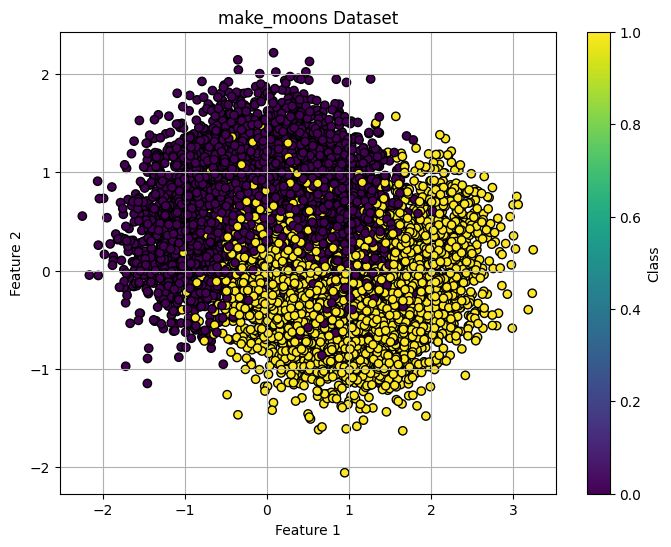

In [104]:
import matplotlib.pyplot as plt

# Plot the full dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('make_moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()



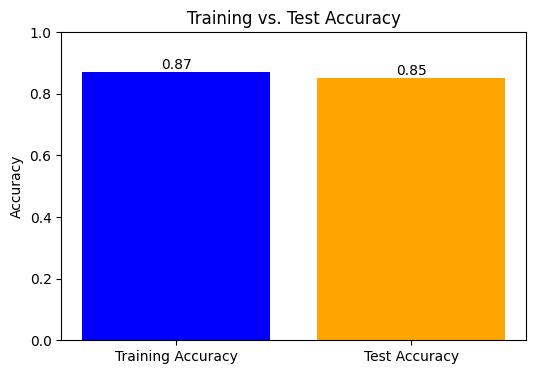

In [105]:
from sklearn.metrics import accuracy_score
# Assuming grid_search has been fitted as in the previous GridSearchCV example
# For reference:
# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_

# Compute accuracies
train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy_score(y_test, best_model.predict(X_test))

# Plot bar chart
plt.figure(figsize=(6, 4))
accuracies = [train_acc, test_acc]
labels = ['Training Accuracy', 'Test Accuracy']
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title('Training vs. Test Accuracy')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

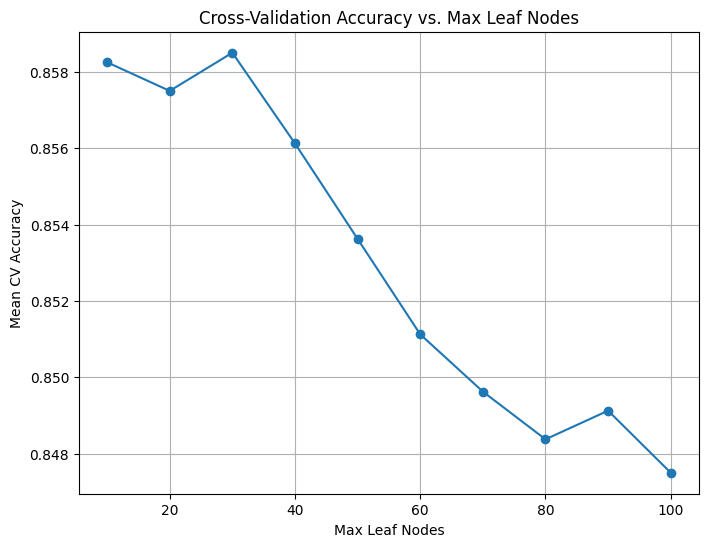

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Extract results from grid_search.cv_results_ (assuming grid_search is already fitted)
params = grid_search.cv_results_['params']
scores = grid_search.cv_results_['mean_test_score']

# Filter for unique max_leaf_nodes values (handling None appropriately)
leaf_nodes = [p.get('max_leaf_nodes', None) for p in params]  # Use .get() to avoid KeyError if absent
unique_leaf_nodes = np.unique([ln for ln in leaf_nodes if ln is not None])  # Exclude None if present, or adjust as needed
avg_scores = [np.mean(scores[np.array(leaf_nodes) == ln]) for ln in unique_leaf_nodes]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(unique_leaf_nodes, avg_scores, marker='o')
plt.title('Cross-Validation Accuracy vs. Max Leaf Nodes')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

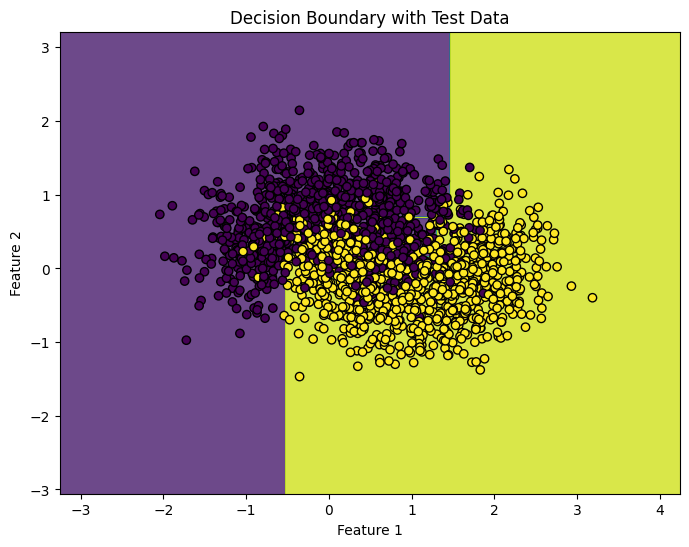

In [107]:
import numpy as np
# Create a mesh grid for contour
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on mesh
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='viridis')
plt.title('Decision Boundary with Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

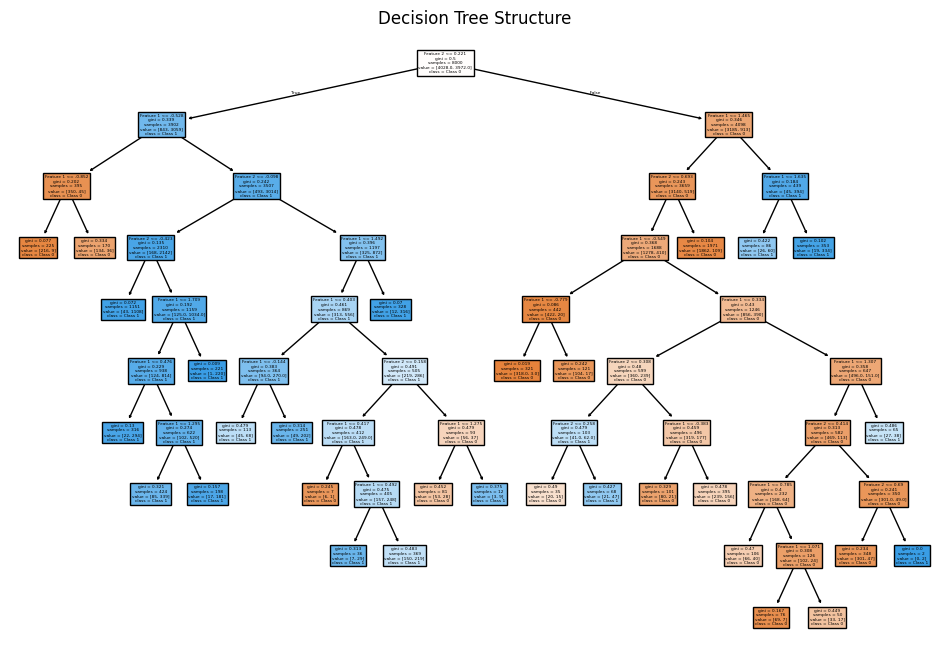

In [108]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title('Decision Tree Structure')
plt.show()